Name : PARUVADA GNANA VARDHAN SIDDU

Task 4 : Exploratory Data Analysis - Terrorism

GRIP @ The Sparks Foundation

In [1]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
# Let's import to our data and check the basics.
terror = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')

In [4]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
# I'm just take important data in whole dataset those I'm using further processing.
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
# Checking the null velues in data
terror.isnull().sum()

Year              0
Month             0
Day               0
Country           1
state            39
Region            1
city              1
latitude        303
longitude       303
AttackType        1
Killed         1159
Wounded        2442
Target           74
Summary        8791
Group             1
Target_type       1
Weapon_type       1
Motive         9055
dtype: int64

In [10]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         9656 non-null   int64  
 1   Month        9656 non-null   int64  
 2   Day          9656 non-null   int64  
 3   Country      9655 non-null   object 
 4   state        9617 non-null   object 
 5   Region       9655 non-null   object 
 6   city         9655 non-null   object 
 7   latitude     9353 non-null   float64
 8   longitude    9353 non-null   float64
 9   AttackType   9655 non-null   object 
 10  Killed       8497 non-null   float64
 11  Wounded      7214 non-null   float64
 12  Target       9582 non-null   object 
 13  Summary      865 non-null    object 
 14  Group        9655 non-null   object 
 15  Target_type  9655 non-null   object 
 16  Weapon_type  9655 non-null   object 
 17  Motive       601 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage

In [11]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: United Kingdom
City with the most attacks: Unknown
Region with the most attacks: Western Europe
Year with the most attacks: 1979
Month with the most attacks: 5
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


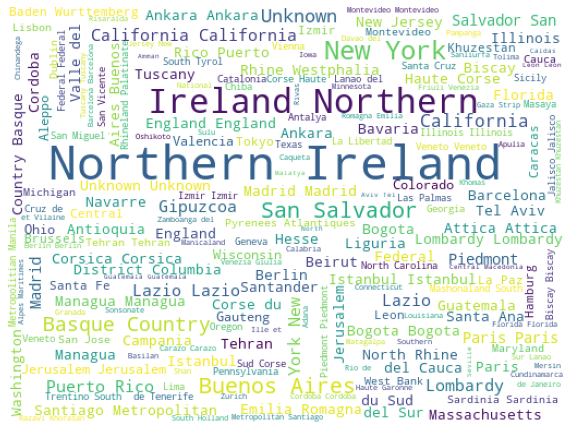

In [12]:
from wordcloud import WordCloud
from scipy import signal
cities = terror.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [13]:
terror['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2404
Name: Year, dtype: int64

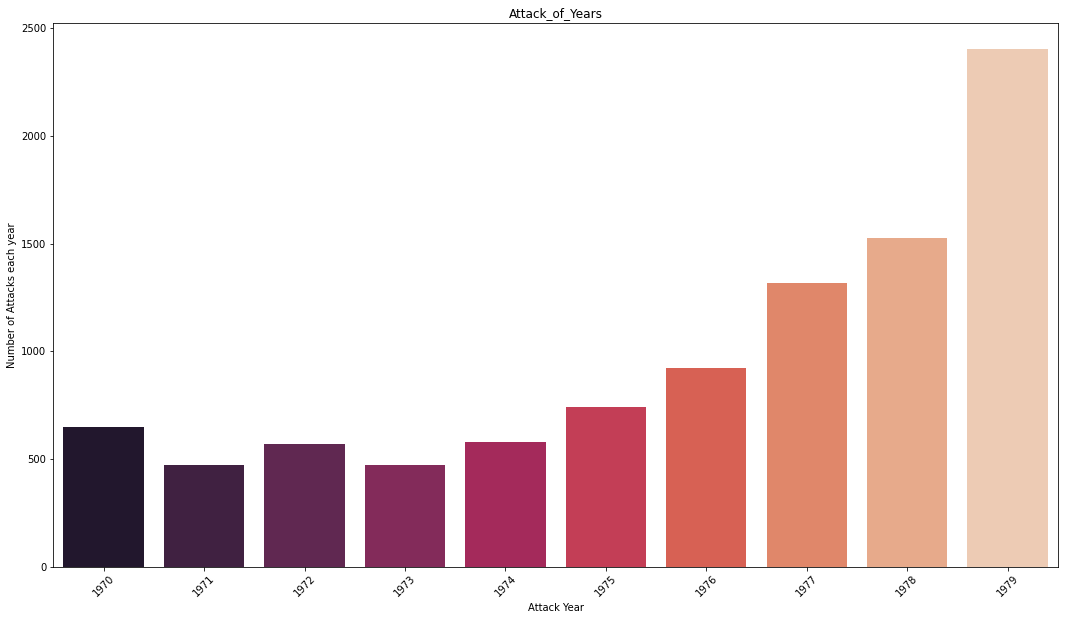

In [14]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()


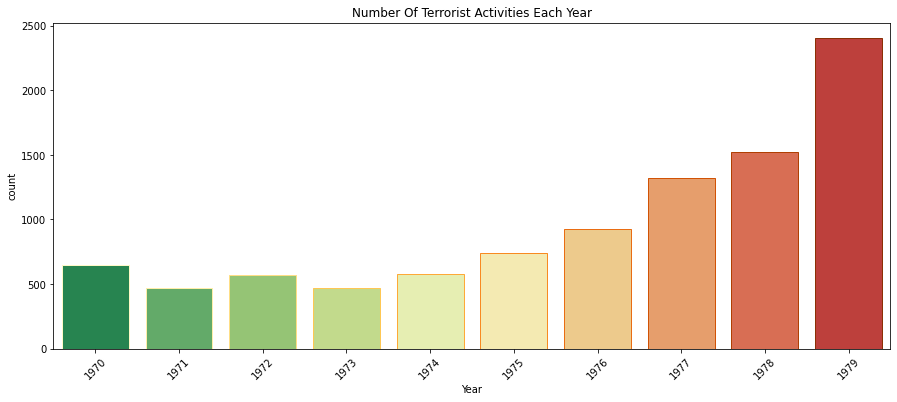

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

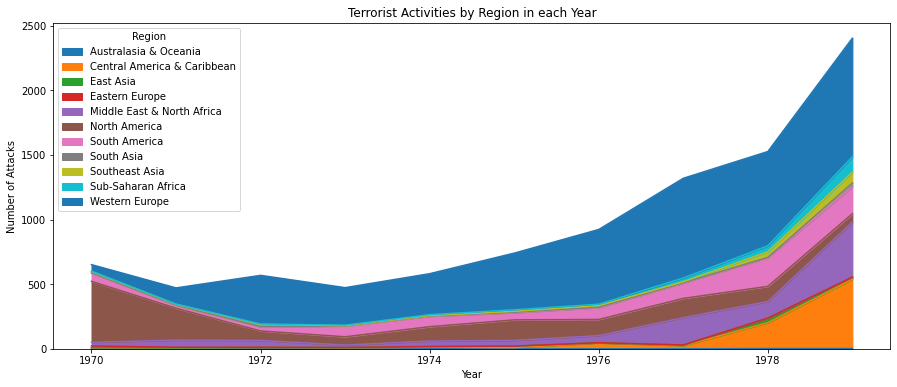

In [16]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [17]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

In [18]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]

In [19]:
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [20]:
heat.head()

Year,1972,1973,1974,1975,1976,1977,1978,1979
Country,,,,,,,,
Argentina,0.0,0.0,0.0,92.0,55.0,0.0,0.0,0.0
Barbados,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
Greece,0.0,60.0,88.0,0.0,0.0,0.0,0.0,0.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,422.0,68.0


In [21]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [22]:
terror.Country.value_counts()[:15]

United Kingdom        1599
United States         1460
Italy                  992
Spain                  890
Turkey                 475
France                 464
Colombia               404
El Salvador            387
Argentina              326
Nicaragua              286
West Germany (FRG)     271
Israel                 188
Iran                   171
Greece                 143
Philippines            123
Name: Country, dtype: int64

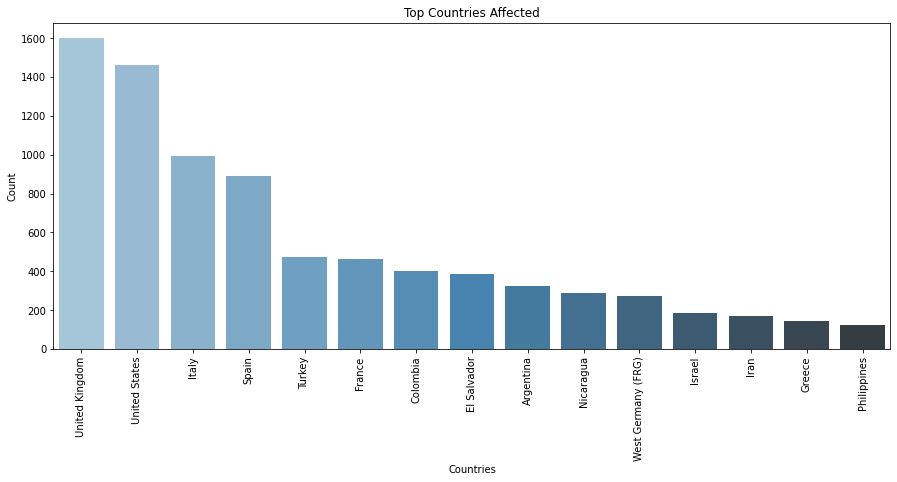

In [23]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [24]:
import folium
from folium.plugins import MarkerCluster 

In [25]:
filterYear = terror['Year'] == 1970

In [26]:
filterData = terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [50]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [28]:
terror.Group.value_counts()[1:15]

Irish Republican Army (IRA)                      983
Basque Fatherland and Freedom (ETA)              424
Protestant extremists                            197
Sandinista National Liberation Front (FSLN)      197
Ulster Volunteer Force (UVF)                     170
Left-Wing Militants                              169
Palestinians                                     149
Corsican National Liberation Front (FLNC)        149
Red Brigades                                     142
People's Liberation Forces (FPL)                 136
Black September                                  120
Montoneros (Argentina)                           114
Revolutionary Armed Forces of Colombia (FARC)    103
Fuerzas Armadas de Liberacion Nacional (FALN)    103
Name: Group, dtype: int64

In [29]:
test = terror[terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [30]:
test.Country.unique()

array(['Peru'], dtype=object)

In [31]:
terror_df_group = terror.dropna(subset=['latitude','longitude'])

In [32]:
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])

In [33]:
terrorist_groups = terror.Group.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]
print(terror_df_group.Group.unique())

['Left-Wing Militants' 'Palestinians' 'Irish Republican Army (IRA)'
 'Ulster Volunteer Force (UVF)'
 'Sandinista National Liberation Front (FSLN)' 'Protestant extremists'
 'Basque Fatherland and Freedom (ETA)']


In [51]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

In [35]:
m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(terror_df_group)):
    marker=folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'],
                                          terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('Mapbox Bright').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)

m1

In [36]:
terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [37]:
# Total Number of people killed in terror attack
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 6929


In [38]:
# Let's look at what types of attacks these deaths were made of.
attackData = terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [39]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [40]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,1519,1923,2083,495,175,196,181,11,346


In [41]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


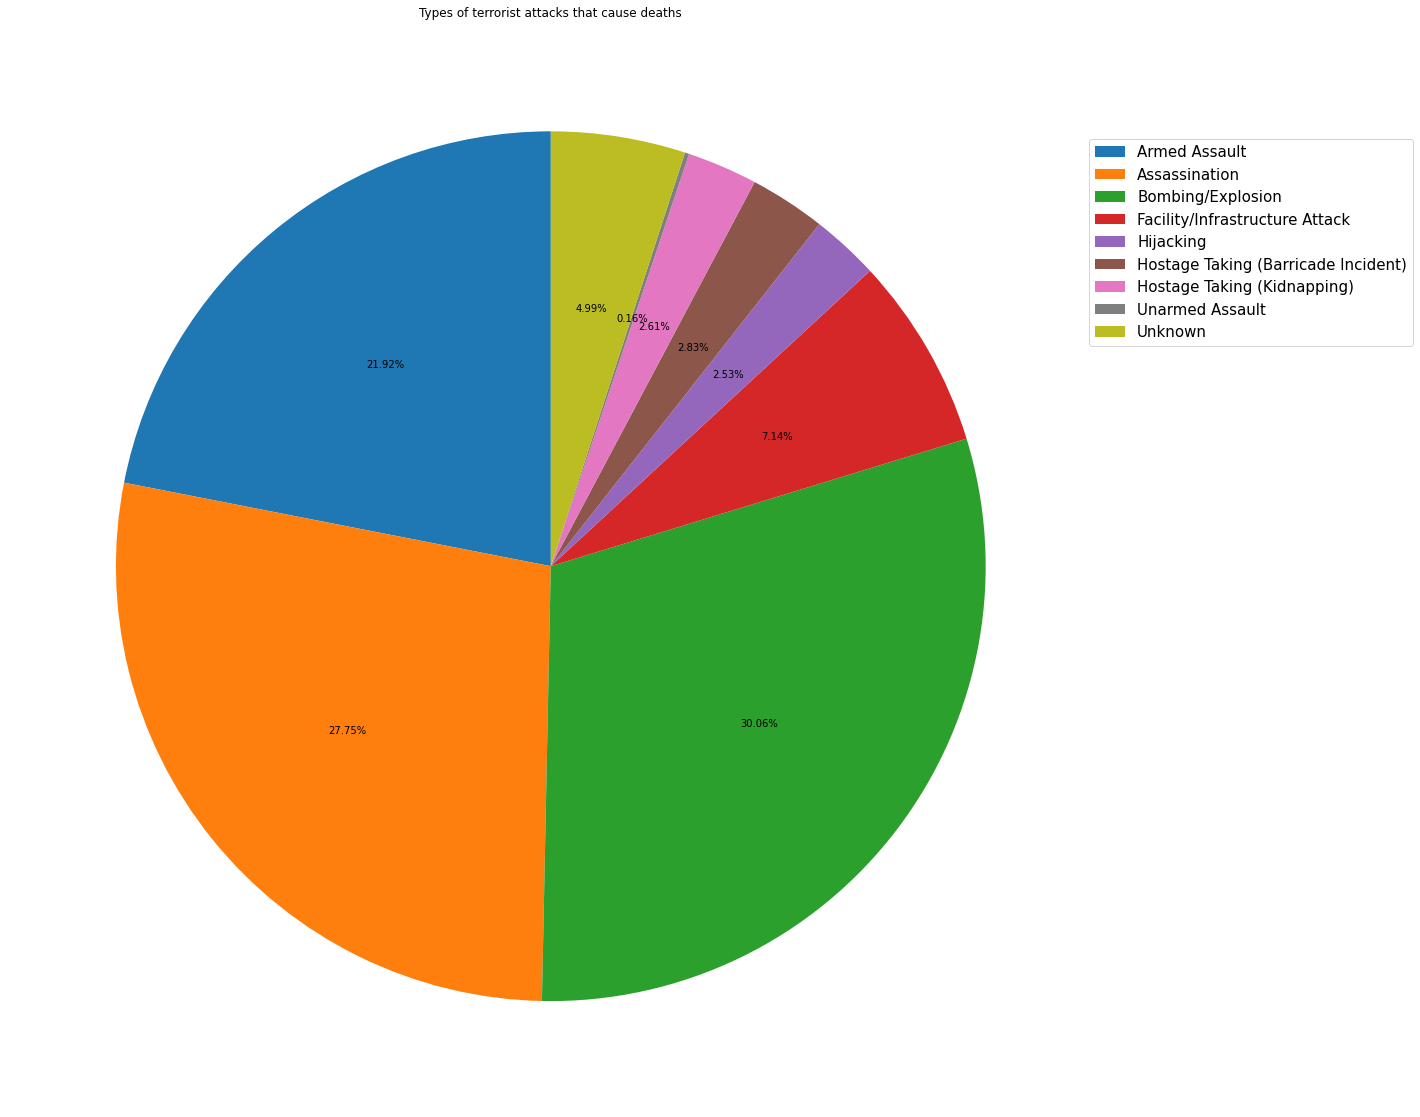

In [42]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

In [43]:
terror.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0


In [44]:
#Number of Killed in Terrorist Attacks by Countries
countryData = terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [45]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,...,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia
Killed,53,0,0,19,328,3,9,0,0,73,...,1746,179,4,2,11,44,0,2,1,5


In [46]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

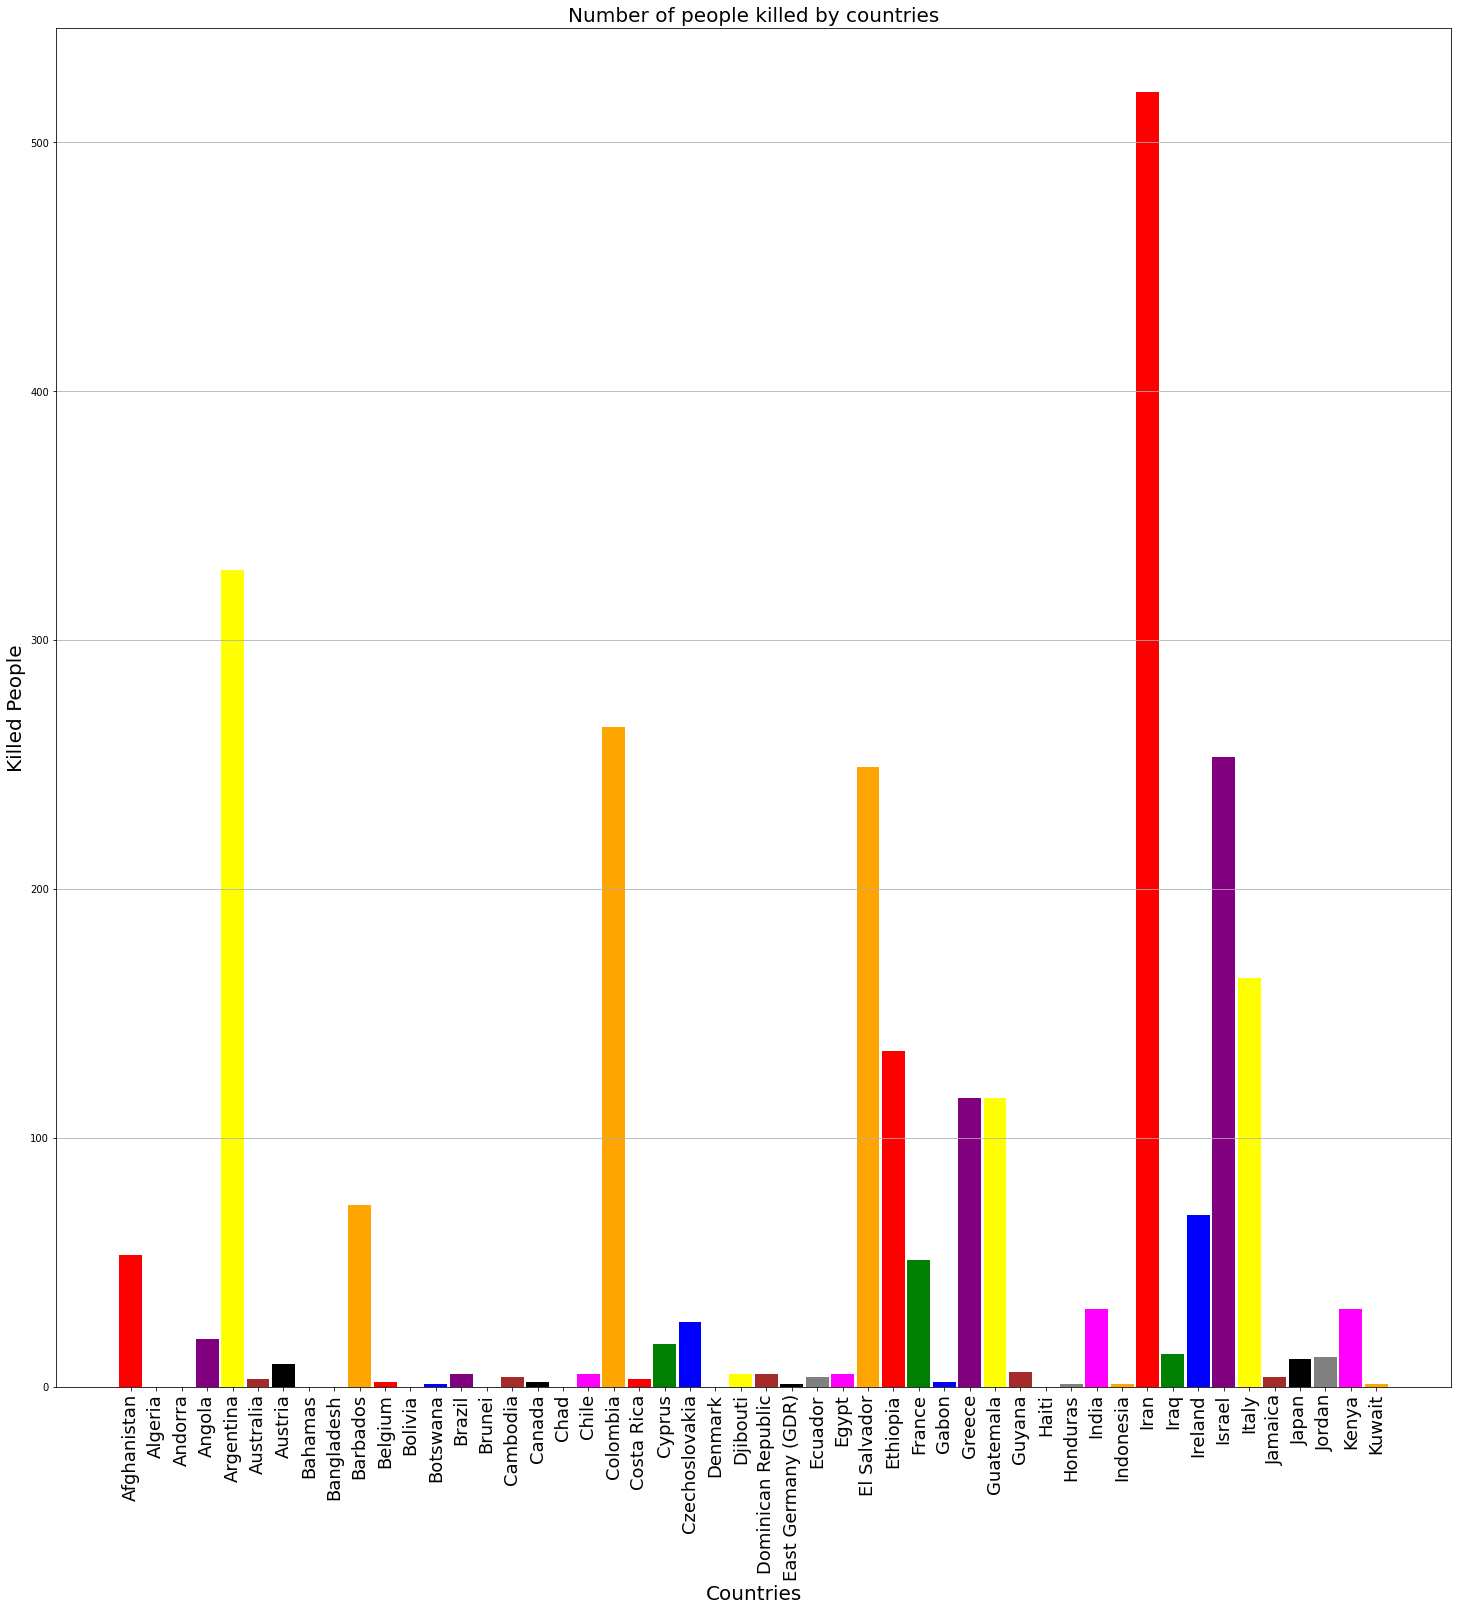

In [47]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

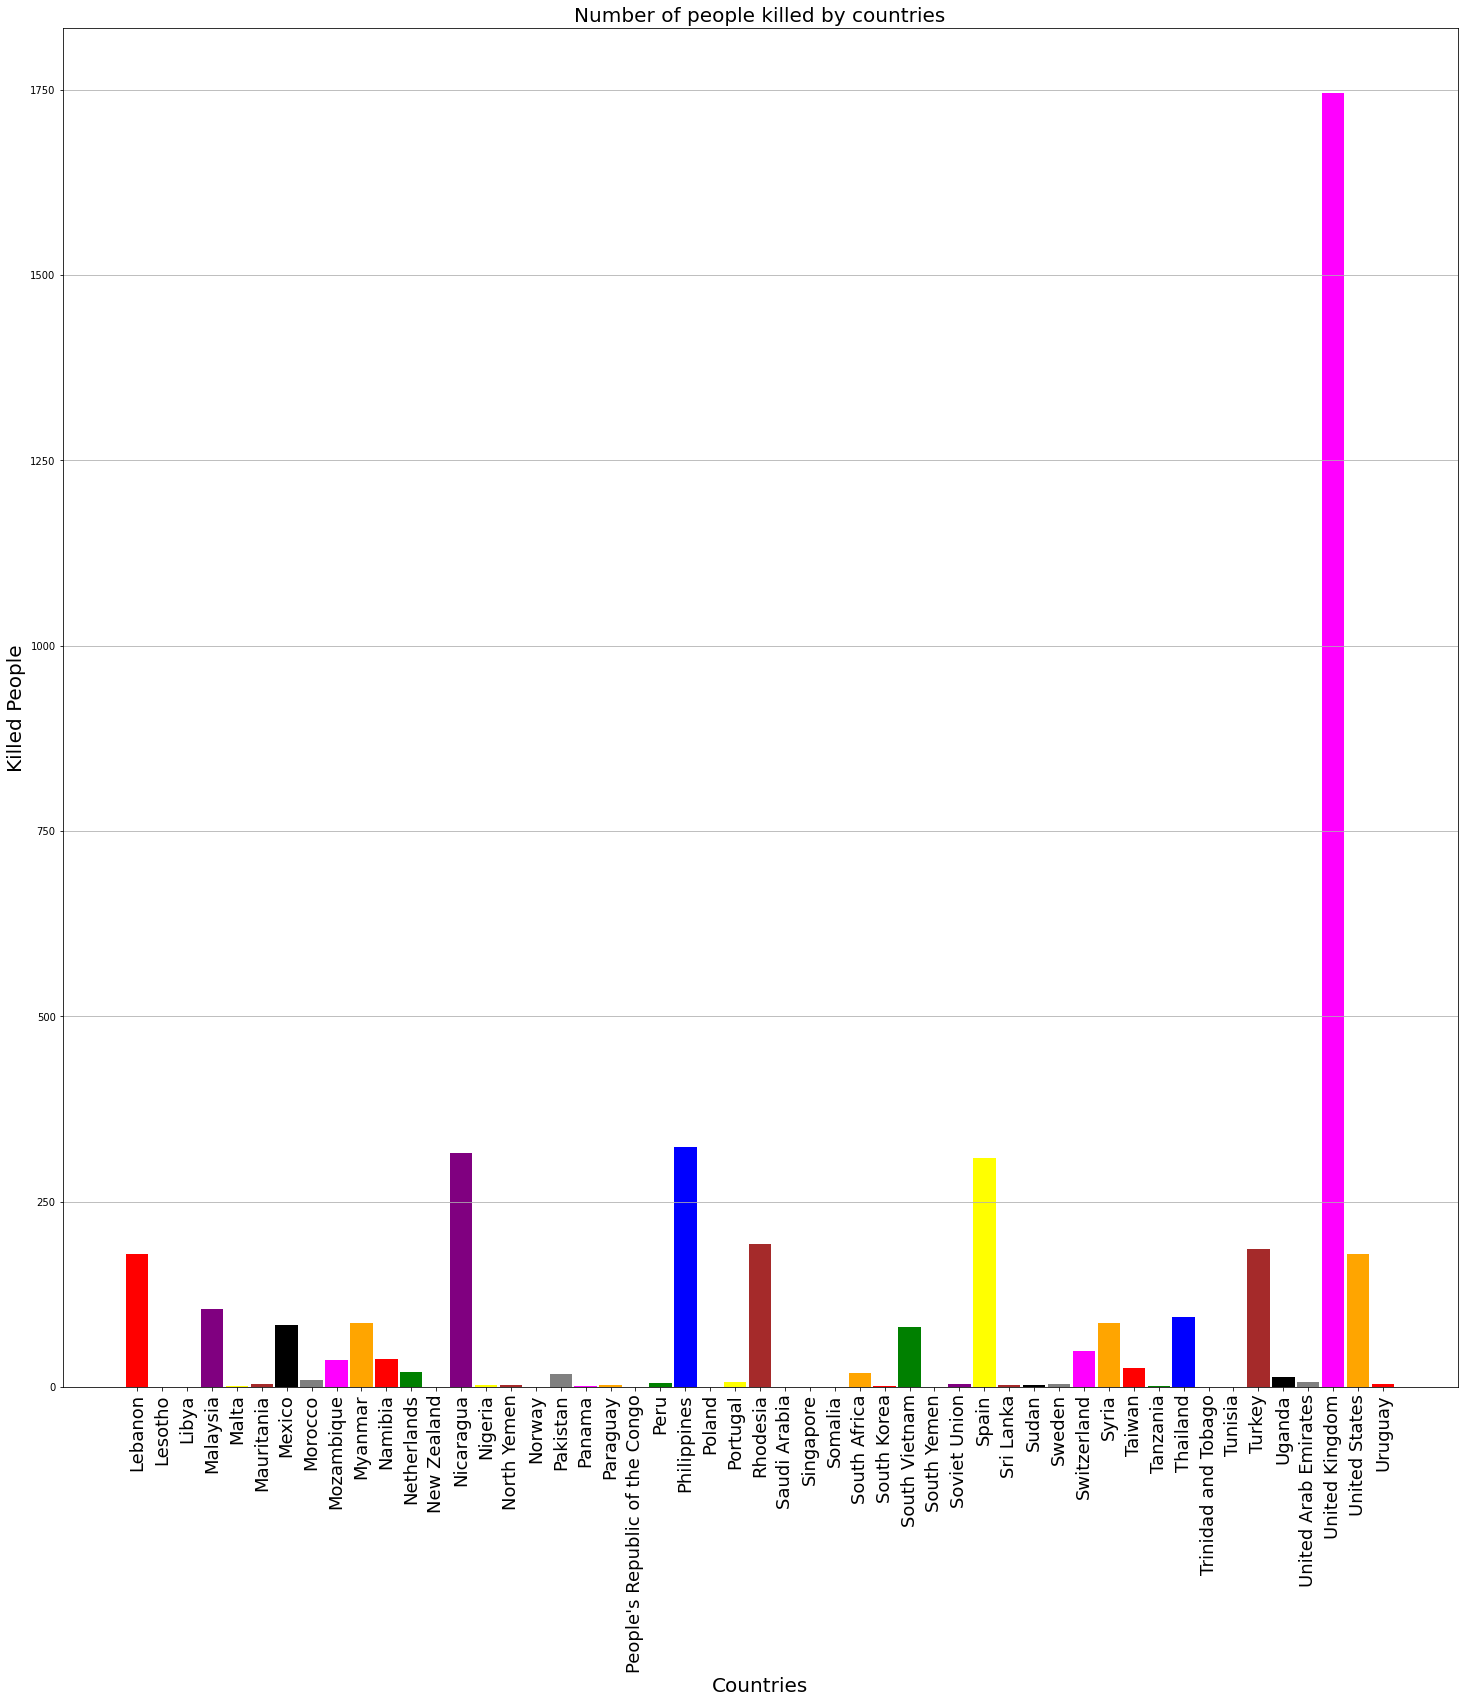

In [48]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

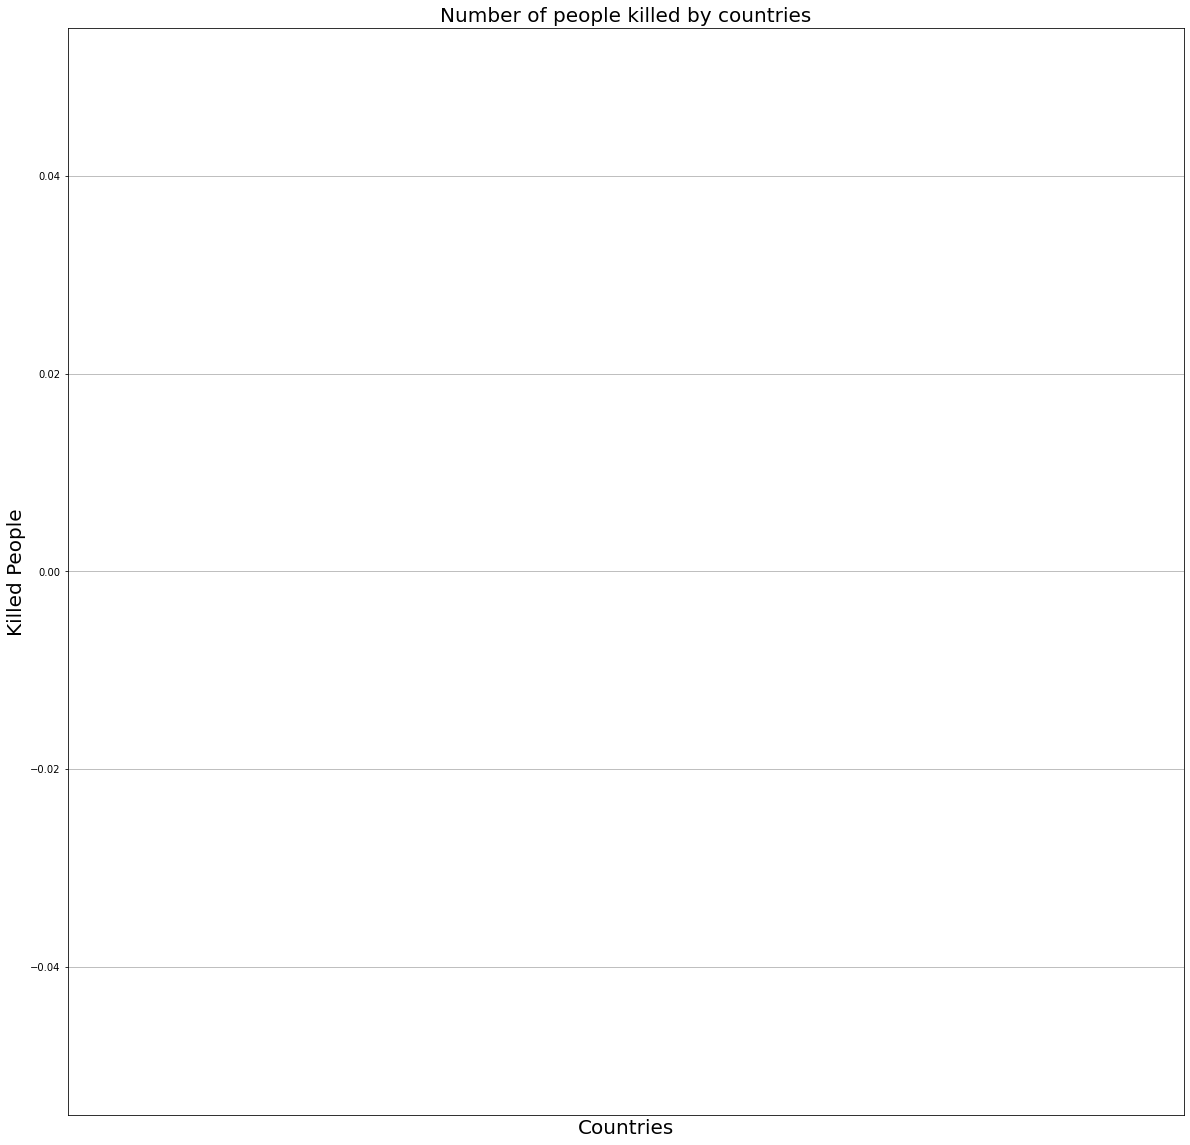

In [49]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.

Thank You